In [21]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import time
import pickle

import torch
import networkx as nx

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [22]:
import sys
sys.path.append('/home/ngr4/project/')
import wearables.scripts.train as weartrain

In [23]:
md_colnames = ['GA', 'age_enroll', 'marital', 'gestage_by', 'insur', 'ethnicity', 
               'race', 'bmi_1vis', 'prior_ptb_all','fullterm_births', 'surghx_none', 
               'alcohol', 'smoke', 'drugs', 'hypertension', 'pregestational_diabetes',
               'asthma_yes___1','asthma_yes___2', 'asthma_yes___3', 'asthma_yes___4', 
               'asthma_yes___5', 'asthma_yes___6', 'asthma_yes___7', 'asthma_yes___8', 
               'asthma_yes___9', 'asthma_yes___10','asthma_yes___13', 'asthma_yes___14', 
               'asthma_yes___15', 'asthma_yes___18', 'asthma_yes___19', 'asthma_yes___20', 
               'other_disease', 'gestational_diabetes', 'ghtn', 'preeclampsia', 'rh', 
               'corticosteroids', 'abuse', 'assist_repro', 'gyn_infection', 
               'maternal_del_weight', 'ptb_37wks', 'cbc_hct', 'cbc_wbc', 'cbc_plts',
               'cbc_mcv', 'art_ph', 'art_pco2', 'art_po2', 'art_excess', 'art_lactate', 
               'ven_ph', 'ven_pco2', 'ven_po2', 'ven_excess', 'ven_lactate', 'anes_type', 
               'epidural', 'deliv_mode', 'infant_wt', 'infant_length', 'head_circ', 
               'death_baby', 'neonatal_complication', 'ervisit', 'ppvisit_dx', 'education1', 
               'paidjob1', 'work_hrs1', 'income_annual1', 'income_support1', 'regular_period1', 
               'period_window1', 'menstrual_days1', 'bc_past1', 'bc_years1', 'months_noprego1', 
               'premature_birth1', 'stress3_1', 'workreg_1trim', 'choosesleep_1trim', 
               'slpwake_1trim', 'slp30_1trim', 'sleep_qual1', 'slpenergy1', 'sitting1', 
               'tv1', 'inactive1', 'passenger1', 'reset1', 'talking1', 'afterlunch1', 
               'cartraffic1','edinb1_1trim', 'edinb2_1trim', 'edinb3_1trim', 'edinb4_1trim', 
               'edinb5_1trim', 'edinb6_1trim', 'edinb7_1trim','edinb8_1trim', 'edinb9_1trim', 
               'edinb10_1trim']



In [24]:
def get_eval(md_colnames, colnum):
    exp = 'chk_all'
    trainer = weartrain.InceptionTime_trainer(exp=exp, trial=0,target=md_colnames[colnum])
    modelpkl = glob.glob('/home/ngr4/scratch60/wearables/model_zoo/*{}*pkl'.format(md_colnames[colnum]))[0]
    res = trainer.eval_test(modelpkl=modelpkl, eval_trainset=False)
    return res['results']['eval_test'].values[0]

In [25]:
out = {}
for i, col in enumerate(md_colnames):
    out[col] = get_eval(md_colnames, i)
    

/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=110.8431
  eval_test  =-0.0542


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=30.5431
  eval_test  =0.1143


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=0.6394
  eval_test  =0.2801
test set eval:
  bst epoch: None
  <loss_test>=1.0634
  eval_test  =0.3090


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=1.0350
  eval_test  =0.2876
test set eval:
  bst epoch: None
  <loss_test>=0.2930
  eval_test  =0.3655


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=0.8760
  eval_test  =0.3787


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=71.6738
  eval_test  =0.0412


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=0.5575
  eval_test  =0.3223


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=1.1159
  eval_test  =0.3100
test set eval:
  bst epoch: None
  <loss_test>=0.6931
  eval_test  =0.4975
test set eval:
  bst epoch: None
  <loss_test>=0.4771
  eval_test  =0.4157
test set eval:
  bst epoch: None
  <loss_test>=0.6658
  eval_test  =0.4074
test set eval:
  bst epoch: None
  <loss_test>=0.6085
  eval_test  =0.4459
test set eval:
  bst epoch: None
  <loss_test>=0.4450
  eval_test  =0.3856
test set eval:
  bst epoch: None
  <loss_test>=0.2809
  eval_test  =0.3813
test set eval:
  bst epoch: None
  <loss_test>=0.6407
  eval_test  =0.5029
test set eval:
  bst epoch: None
  <loss_test>=0.3115
  eval_test  =0.4827
test set eval:
  bst epoch: None
  <loss_test>=0.4834
  eval_test  =0.4975
test set eval:
  bst epoch: None
  <loss_test>=0.2835
  eval_test  =0.5222
test set eval:
  bst epoch: None
  <loss_test>=0.1485
  eval_test  =0.5159


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=0.0113
  eval_test  =1.0000
test set eval:
  bst epoch: None
  <loss_test>=0.1434
  eval_test  =0.5705
test set eval:
  bst epoch: None
  <loss_test>=0.1441
  eval_test  =0.4812
test set eval:
  bst epoch: None
  <loss_test>=0.1664
  eval_test  =0.5199
test set eval:
  bst epoch: None
  <loss_test>=0.1009
  eval_test  =0.5239
test set eval:
  bst epoch: None
  <loss_test>=0.1249
  eval_test  =0.5468


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=0.0174
  eval_test  =1.0000


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=0.0177
  eval_test  =1.0000
test set eval:
  bst epoch: None
  <loss_test>=0.3336
  eval_test  =0.4693
test set eval:
  bst epoch: None
  <loss_test>=0.3971
  eval_test  =0.4806
test set eval:
  bst epoch: None
  <loss_test>=0.4007
  eval_test  =0.4900
test set eval:
  bst epoch: None
  <loss_test>=0.6998
  eval_test  =0.3690
test set eval:
  bst epoch: None
  <loss_test>=0.4772
  eval_test  =0.3713
test set eval:
  bst epoch: None
  <loss_test>=0.6177
  eval_test  =0.4349
test set eval:
  bst epoch: None
  <loss_test>=0.7386
  eval_test  =0.3714
test set eval:
  bst epoch: None
  <loss_test>=0.5110
  eval_test  =0.3623
test set eval:
  bst epoch: None
  <loss_test>=0.5618
  eval_test  =0.3752
test set eval:
  bst epoch: None
  <loss_test>=0.3103
  eval_test  =0.3873
test set eval:
  bst epoch: None
  <loss_test>=0.3165
  eval_test  =0.3893
test set eval:
  bst epoch: None
  <loss_test>=0.8658
  eval_test  =0.4146


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=543.3829
  eval_test  =-0.0019
test set eval:
  bst epoch: None
  <loss_test>=0.5986
  eval_test  =0.3925


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=7.3226
  eval_test  =0.0070


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=6.6058
  eval_test  =-0.0114


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=4837.3608
  eval_test  =-0.0289


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=33.6869
  eval_test  =0.0234


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=0.0055
  eval_test  =-0.1178


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=115.8625
  eval_test  =-0.0076


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=270.1952
  eval_test  =-0.0023


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=6.2211
  eval_test  =-0.0030


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=2.4838
  eval_test  =-0.0129


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=0.0454
  eval_test  =-0.0366


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=54.7127
  eval_test  =-0.0788


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=164.9121
  eval_test  =-0.0082


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=6.1115
  eval_test  =-0.0035


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=3.5471
  eval_test  =-0.0029


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=0.6435
  eval_test  =-0.0794
test set eval:
  bst epoch: None
  <loss_test>=0.5960
  eval_test  =0.5161
test set eval:
  bst epoch: None
  <loss_test>=1.0415
  eval_test  =0.3121


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=410525.5625
  eval_test  =-0.0028


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=15.2100
  eval_test  =-0.0611


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=4.8372
  eval_test  =0.0489
test set eval:
  bst epoch: None
  <loss_test>=0.1278
  eval_test  =0.5128
test set eval:
  bst epoch: None
  <loss_test>=0.7996
  eval_test  =0.3723
test set eval:
  bst epoch: None
  <loss_test>=0.2485
  eval_test  =0.5146


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=0.9664
  eval_test  =0.2657
test set eval:
  bst epoch: None
  <loss_test>=1.4479
  eval_test  =0.3111
test set eval:
  bst epoch: None
  <loss_test>=0.6461
  eval_test  =0.6158
test set eval:
  bst epoch: None
  <loss_test>=1.4463
  eval_test  =0.2907
test set eval:
  bst epoch: None
  <loss_test>=1.9744
  eval_test  =0.2282


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


test set eval:
  bst epoch: None
  <loss_test>=1.6316
  eval_test  =0.1420
test set eval:
  bst epoch: None
  <loss_test>=0.8619
  eval_test  =0.3775
test set eval:
  bst epoch: None
  <loss_test>=1.2876
  eval_test  =0.2568
test set eval:
  bst epoch: None
  <loss_test>=1.6998
  eval_test  =0.1924
test set eval:
  bst epoch: None
  <loss_test>=0.5187
  eval_test  =0.5986


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/gpfs/ysm/project/dijk/ngr4/conda_envs/w

test set eval:
  bst epoch: None
  <loss_test>=2.6814
  eval_test  =0.0917
test set eval:
  bst epoch: None
  <loss_test>=1.1624
  eval_test  =0.3144
test set eval:
  bst epoch: None
  <loss_test>=0.8187
  eval_test  =0.4094
test set eval:
  bst epoch: None
  <loss_test>=1.6835
  eval_test  =0.2287
test set eval:
  bst epoch: None
  <loss_test>=0.6936
  eval_test  =0.6203
test set eval:
  bst epoch: None
  <loss_test>=0.8386
  eval_test  =0.4153
test set eval:
  bst epoch: None
  <loss_test>=1.2214
  eval_test  =0.2695
test set eval:
  bst epoch: None
  <loss_test>=1.4935
  eval_test  =0.2749
test set eval:
  bst epoch: None
  <loss_test>=1.2868
  eval_test  =0.2570
test set eval:
  bst epoch: None
  <loss_test>=1.5005
  eval_test  =0.2554
test set eval:
  bst epoch: None
  <loss_test>=1.5425
  eval_test  =0.2337
test set eval:
  bst epoch: None
  <loss_test>=1.4508
  eval_test  =0.2803
test set eval:
  bst epoch: None
  <loss_test>=1.2707
  eval_test  =0.1935
test set eval:
  bst epoc

/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


## plot on corr net

In [26]:
def load_md_GAerror_mdtaskperformance(sfp='/home/ngr4/project', verbose=False):
    '''Get the metadata, error on primary task, and eval_metric on md columns.
    
    TODO (#enhancement): pull from results file and normalize eval_metric to be able to acc/mae
    
    Arugments:
      sfp: path to wearables and featnets project scripts
      
    Returns:
      md, GAerror, md_eval
    '''
    # get md and error for node color
    import sys
    sys.path.append(sfp)
    import wearables.scripts.train as weartrain

    trainer = weartrain.InceptionTimeRegressor_trainer(trial=0, 
                                                       patience=None, n_epochs=2000,
                                                       batch_size=32)
    res = trainer.eval_test(modelpkl='/home/ngr4/project/wearables/model_zoo/61-InceptionTime_GA4.pkl', eval_trainset=True)
    md = res['md']
    # process
    pp_md = md.loc[:, [i for i in md.columns if i not in ['index', 'pid', 'record_id', 'Absolute Error', 'yGA', 'yhatGA']]]
    error_GA = md['Absolute Error'] # wks
    
    md_res = pd.read_csv('/home/ngr4/project/wearables/results/InceptionTimev0.2_allmd.csv', index_col=0)

    # normalize by mean value
    md_res['ave_p1norm'] = md_res['target'].map(md.astype(np.float32).abs().mean().to_dict())
    md_res.loc[md_res['tasktype']=='regression', 'eval_test'] = (1 - md_res.loc[md_res['tasktype']=='regression', 'eval_test'] / md_res.loc[md_res['tasktype']=='regression', 'ave_p1norm'] )

    # output eval_test
    md_res_error = md_res.groupby(['target']).mean()['eval_test'].to_dict()
    return pp_md, error_GA, md_res_error

def corr_net(df, row_norm=True, self_loops=False):
    
    '''Undirected, weighted adjacency where elements indicate correlations between features.
    
    TODO (#enhancement): make more efficient by only storing one value and using scipy.sparse
   
    NOTE: forces conversion to float32 and if including self-loops, the self-loop will be
      added prior to normalization
    '''
    from scipy.stats import kendalltau
    I = df.shape[1] # number of nodes comes from n_columns, i.e., n_feats
    if self_loops:
        A = np.eye(I, dtype=np.float32) 
    else:
        A = np.zeros((I, I), dtype=np.float32)
    for i in range(I):
        for j in range(i+1, I):
            corr_metric, p = kendalltau(df.iloc[:, i].astype(np.float32), df.iloc[:, j].astype(np.float32))
            # could store -log10(P) instead of corr_metric
            A[i, j] = corr_metric
            A[j, i] = corr_metric
    if row_norm:
        A = (A/ A.sum(1)[:, np.newaxis])
    return pd.DataFrame(A, index=df.columns.to_list(), columns=df.columns.to_list())

def plot_networkx(df_corrnet, node_colors=None, node_sizes=None, show_edges=None, annotate=False, out_file=None):
    if 'percentile' in show_edges:
        q = float('0.{}'.format(show_edges.split('percentile')[0]))
        show_edges = np.quantile(df_corrnet.to_numpy(), q)
    if node_sizes is None:
        node_sizes = 30
    else:
        node_sizes = 15*(np.array(node_sizes)+1)**4
    if node_colors is None:
        node_colors = ['orange']*data_umap.shape[0]
        cmap = None
    else:
        cmap = 'RdYlBu_r'
        
    fig = plt.figure(figsize=(20, 16))
    
    G = nx.from_numpy_matrix(np.abs(df_corrnet.to_numpy()))
    G = nx.relabel.relabel_nodes(G, {i:v for i,v in enumerate(df_corrnet.columns.to_list())})
    pos = nx.spring_layout(G)
    G.remove_edges_from(nx.selfloop_edges(G))
    if show_edges is None:
        show_edges = -np.inf 
    edge_labels = [G.remove_edge(u, v) if k < show_edges else 0.5*(k+1)**3 for (u,v) ,k in nx.get_edge_attributes(G,'weight').items()]
    nx.draw_networkx_edges(G, pos, alpha=0.3, 
#                            width=edge_labels, 
                           edge_color="gray")
    im = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                           node_color=node_colors, alpha=0.75, 
                           cmap=cmap)
    nx.draw_networkx_labels(G, pos, font_size=12)
    
    if node_colors is not None:
        cbar = fig.colorbar(im)
        cbar.set_label('Average Precision or R-squared')
    
    if out_file is not None:
        fig.savefig(out_file, bbox_inches='tight', dpi=300)
        

In [27]:
md = md.loc[:, [i for i in md.columns if i not in ['asthma_yes___6', 'asthma_yes___15', 'asthma_yes___14']]]

In [28]:
md, GAerror, md_eval = load_md_GAerror_mdtaskperformance()
md = md.loc[:, [i for i in md.columns if i not in ['asthma_yes___6', 'asthma_yes___15', 'asthma_yes___14']]]
df_corrnet = corr_net(md)

train set eval:
  bst epoch: None
  <loss_train>=63.5099
  eval_train  =6.7440


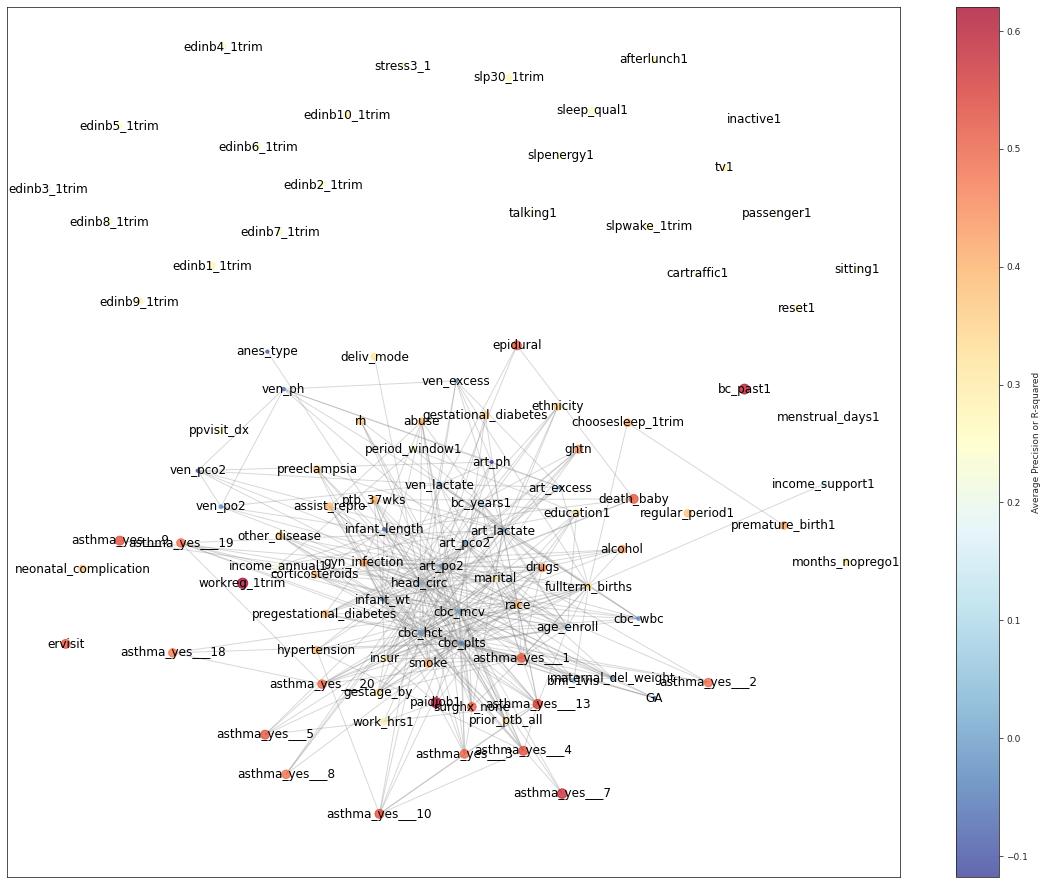

In [65]:
plot_networkx(df_corrnet, 
              node_colors=[out[i] for i in df_corrnet.columns],
              node_sizes=[out[i] for i in df_corrnet.columns], 
              show_edges='95percentile', annotate=True,
              out_file='/home/ngr4/project/featurenets/results/IT_allmd_AP_Rsq.png')

## plot precision recall

In [58]:
pd.Series(out).sort_values(ascending=False).head(15)

asthma_yes___6     1.000000
asthma_yes___15    1.000000
asthma_yes___14    1.000000
workreg_1trim      0.620320
paidjob1           0.615751
bc_past1           0.598613
asthma_yes___7     0.570515
asthma_yes___13    0.546825
asthma_yes___10    0.523863
asthma_yes___4     0.522180
asthma_yes___9     0.519938
epidural           0.516099
asthma_yes___5     0.515857
ervisit            0.514569
death_baby         0.512816
dtype: float64

## tshoot

In [60]:
def plot_macro_roc(output, target, target_label, out_file=None):
    n_classes = output.shape[1]
    from sklearn.metrics import roc_auc_score, roc_curve, auc
    from scipy import interp
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], output[:, i].exp())
        roc_auc[i] = auc(fpr[i], tpr[i])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.plot(fpr["macro"], tpr["macro"],
             label='macro-average AU-ROC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle='-', linewidth=2)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_title(target_label)
    ax.legend()
    if out_file is not None:
        fig.savefig(out_file, bbox_inches='tight', dpi=300)
    return fpr['macro'], tpr['macro']

test set eval:
  bst epoch: None
  <loss_test>=0.2485
  eval_test  =0.5146


/tmp/ipykernel_3413/1108002375.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


test set eval:
  bst epoch: None
  <loss_test>=0.1278
  eval_test  =0.5128


/tmp/ipykernel_3413/1108002375.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


test set eval:
  bst epoch: None
  <loss_test>=0.6936
  eval_test  =0.6203


/tmp/ipykernel_3413/1108002375.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


test set eval:
  bst epoch: None
  <loss_test>=0.6461
  eval_test  =0.6158


/tmp/ipykernel_3413/1108002375.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


test set eval:
  bst epoch: None
  <loss_test>=0.5187
  eval_test  =0.5986


/tmp/ipykernel_3413/1108002375.py:19: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


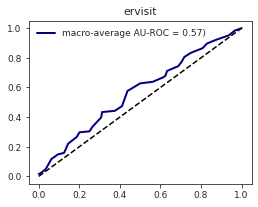

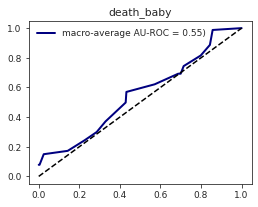

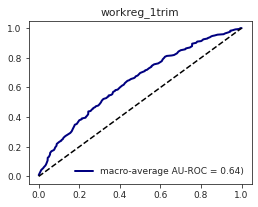

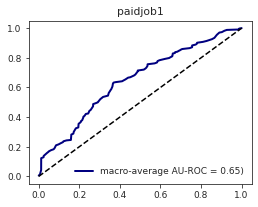

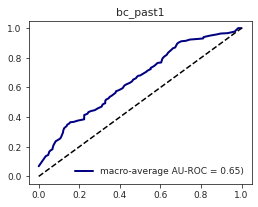

In [64]:
for target_label in ['ervisit', 'death_baby', 'workreg_1trim', 'paidjob1', 'bc_past1']:
    colnum = [i for i, c in enumerate(md_colnames) if c==target_label][0]
    trainer = weartrain.InceptionTime_trainer(exp='chkall', trial=0,target=md_colnames[colnum])
    modelpkl = glob.glob('/home/ngr4/scratch60/wearables/model_zoo/*{}*pkl'.format(md_colnames[colnum]))[0]
    res = trainer.eval_test(modelpkl=modelpkl, eval_trainset=False)
    output, target = res['yhat'], res['y']
    y_true = torch.zeros(target.shape[0], trainer.out_dim)
    y_true[torch.arange(target.shape[0]), target] = 1.
    fpr, tpr = plot_macro_roc(output.exp(), target, target_label, out_file='/home/ngr4/project/wearables/results/auroc_{}.png'.format(target_label))

## regressions

### infant_wt

In [71]:
target_label = 'infant_wt'
colnum = [i for i, c in enumerate(md_colnames) if c==target_label][0]
trainer = weartrain.InceptionTime_trainer(exp='chkall', trial=0,target=md_colnames[colnum])
modelpkl = glob.glob('/home/ngr4/scratch60/wearables/model_zoo/*{}*pkl'.format(md_colnames[colnum]))[0]
res = trainer.eval_test(modelpkl=modelpkl, eval_trainset=False)
output, target = res['yhat'], res['y']

test set eval:
  bst epoch: None
  <loss_test>=410525.5312
  eval_test  =-0.0028


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [82]:
[ax.get_xlim(), ax.get_ylim()]

[(-95.95000000000002, 4676.95), (2625.371691894531, 3677.888806152344)]

test set eval:
  bst epoch: None
  <loss_test>=410525.5625
  eval_test  =-0.0028


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


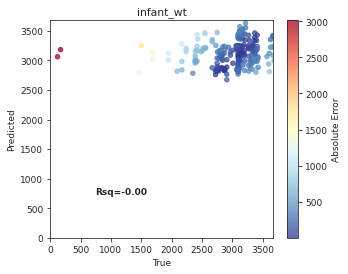

In [90]:
def plot_reg_eval(out, target_label='infant_wt', out_file=None):
    colnum = [i for i, c in enumerate(md_colnames) if c==target_label][0]
    trainer = weartrain.InceptionTime_trainer(exp='chkall', trial=0,target=md_colnames[colnum])
    modelpkl = glob.glob('/home/ngr4/scratch60/wearables/model_zoo/*{}*pkl'.format(md_colnames[colnum]))[0]
    res = trainer.eval_test(modelpkl=modelpkl, eval_trainset=False)
    output, target = res['yhat'], res['y']
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    im = ax.scatter(target, output, c=(target - output.squeeze()).abs(), cmap='RdYlBu_r', s=20, alpha=0.75)
    ax.set_ylabel('Predicted')
    ax.set_xlabel('True')
    cbar = fig.colorbar(im)
    cbar.set_label('Absolute Error')
    ax.set_title(target_label)
    ax.set_xlim([0, max(max(ax.get_xlim(), ax.get_ylim()))])
    ax.set_ylim([0, max(max(ax.get_xlim(), ax.get_ylim()))])
    ax.text(0.2, 0.2, 'Rsq={:.2f}'.format(out[target_label]), transform=ax.transAxes, weight='bold')

    if out_file is not None:
        fig.savefig(out_file, bbox_inches='tight', dpi=300)

/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


test set eval:
  bst epoch: None
  <loss_test>=410525.5000
  eval_test  =-0.0028


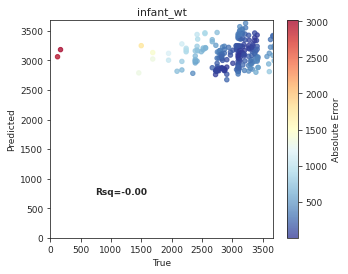

In [91]:
plot_reg_eval(out, out_file='/home/ngr4/project/wearables/results/rsq_predVtrue_infant_wt.png')

In [ ]:
target_label = 'asthma_yes___6'
colnum = [i for i, c in enumerate(md_colnames) if c==target_label][0]
trainer = weartrain.InceptionTime_trainer(exp='chkall', trial=0,target=md_colnames[colnum])
modelpkl = glob.glob('/home/ngr4/scratch60/wearables/model_zoo/*{}*pkl'.format(md_colnames[colnum]))[0]
res = trainer.eval_test(modelpkl=modelpkl, eval_trainset=False)
output, target = res['yhat'], res['y']
y_true = torch.zeros(target.shape[0], trainer.out_dim)
y_true[torch.arange(target.shape[0]), target] = 1.

test set eval:
  bst epoch: None
  <loss_test>=0.0113
  eval_test  =1.0000


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [15]:
y_true[:, 1].sum()

tensor(0.)

In [16]:
target_label = 'marital'
colnum = [i for i, c in enumerate(md_colnames) if c==target_label][0]
trainer = weartrain.InceptionTime_trainer(exp='chkall', trial=0,target=md_colnames[colnum])
modelpkl = glob.glob('/home/ngr4/scratch60/wearables/model_zoo/*{}*pkl'.format(md_colnames[colnum]))[0]
res = trainer.eval_test(modelpkl=modelpkl, eval_trainset=False)
output, target = res['yhat'], res['y']
y_true = torch.zeros(target.shape[0], trainer.out_dim)
y_true[torch.arange(target.shape[0]), target] = 1.

test set eval:
  bst epoch: None
  <loss_test>=0.6394
  eval_test  =nan


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [24]:
y_true[:, 3].sum()

tensor(0.)

In [16]:
out = []
for i in range(y_true.shape[1]):
    p=average_precision_score(y_true[:, i], output.exp()[:, i], average='micro')
    print(p)
    out.append(p)
print(np.nanmean(out))

1.0
nan
1.0


/gpfs/ysm/project/dijk/ngr4/conda_envs/wearables/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [18]:
y_trueoutput.exp()[:, 1]

tensor([[0.1313, 0.8220, 0.0124,  ..., 0.0049, 0.0126, 0.0103],
        [0.5768, 0.3496, 0.0217,  ..., 0.0037, 0.0292, 0.0077],
        [0.6767, 0.2846, 0.0081,  ..., 0.0018, 0.0192, 0.0023],
        ...,
        [0.3126, 0.6400, 0.0160,  ..., 0.0034, 0.0127, 0.0083],
        [0.2772, 0.6166, 0.0320,  ..., 0.0091, 0.0277, 0.0220],
        [0.3779, 0.5841, 0.0083,  ..., 0.0024, 0.0169, 0.0036]])

# what is going on

In [59]:
from sklearn.metrics import average_precision_score
import torch
y_true = np.concatenate((np.ones((500, 2)), np.zeros((500,2))), 1)
y_true = torch.tensor(y_true)
y_pred = torch.log_softmax(torch.tensor(np.random.uniform(size=(500, 4))), dim=1).exp()
average_precision_score(y_true, y_pred, average='micro')

0.49102383929613325

In [18]:
colnum = 63
trainer = weartrain.InceptionTime_trainer(exp='chkall', trial=0,target=md_colnames[colnum])
modelpkl = glob.glob('/home/ngr4/scratch60/wearables/model_zoo/*{}*pkl'.format(md_colnames[colnum]))[0]
res = trainer.eval_test(modelpkl=modelpkl, eval_trainset=False)
output, target = res['yhat'], res['y']
y_true = torch.zeros(target.shape[0], trainer.out_dim)
y_true[torch.arange(target.shape[0]), target] = 1.


train set eval:
  bst epoch: None
  <loss_train>=0.0888
  eval_train  =0.5061


In [16]:
res['yhat'].exp().max(1)[1].sum()

tensor(0)

In [14]:
average_precision_score(y_true[:, 1], res['yhat'].exp()[:, 0], average='micro')

0.013550308263448087

In [80]:
average_precision_score(y_true.numpy().astype(int), res['yhat'].exp().numpy(), average='micro')

0.9687293089047986

In [70]:
res['yhat'].exp().max(1)[1].sum()

tensor(0)

In [ ]:
torch.log_sdd